# Example usage

To use `pycredits` in a project:

In [1]:
import pycredits

print(pycredits.__version__)

0.1.0


## Imports

In [2]:
from pycredits.data_preprocessing import preprocess_data
from pycredits.column_histogram import column_histogram
from pycredits.label_mapper import map_labels_to_binary
from pycredits.param_grid import param_grid_for_grid_search
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Preprocess Data
Let's preprocess a sample dataset containing information about credit risk:

In [3]:
df = pd.DataFrame({
    "Duration": [6, 48, 12, 42, 24],
    "Credit amount": [1169, 5951, 2096, 7882, 4870],
    "Age": [67, 22, 49, 45, 53],
    "Status": ["A11", "A12", "A14", "A11", "A13"],
    "Credit history": ["A34", "A32", "A34", "A32", "A33"],
    "Purpose": ["A43", "A46", "A42", "A43", "A40"],
    "Savings account": ["A65", "A61", "A61", "A61", "A61"],
    "Credit_risk": [1, 2, 1, 1, 2]
})
numeric_features = ["Duration", "Credit amount", "Age"]
categorical_features = ["Status", "Credit history", "Purpose", "Savings account"]

X_transformed, y, preprocessor = preprocess_data(df, numeric_features, categorical_features)
X_transformed_df = pd.DataFrame(X_transformed, columns=[f"Feature_{i}" for i in range(X_transformed.shape[1])])

print("X_transformed:")
print(X_transformed_df)

print("y:")
print(y)

print("preprocessor:")
print(preprocessor)

X_transformed:
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0  -1.246500  -1.305637   1.354260        1.0        0.0        0.0   
1   1.319824   0.630589  -1.723603        0.0        1.0        0.0   
2  -0.879883  -0.930295   0.123115        0.0        0.0        0.0   
3   0.953206   1.412449  -0.150473        1.0        0.0        0.0   
4  -0.146647   0.192894   0.396702        0.0        0.0        1.0   

   Feature_6  Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  \
0        0.0        0.0        0.0        1.0         0.0         0.0   
1        0.0        1.0        0.0        0.0         0.0         0.0   
2        1.0        0.0        0.0        1.0         0.0         1.0   
3        0.0        1.0        0.0        0.0         0.0         0.0   
4        0.0        0.0        1.0        0.0         1.0         0.0   

   Feature_12  Feature_13  Feature_14  Feature_15  
0         1.0         0.0         0.0         1.0  
1         0.0  

## Create a Histogram
We can create a histogram for a specific column in our dataset to visualize its distribution:

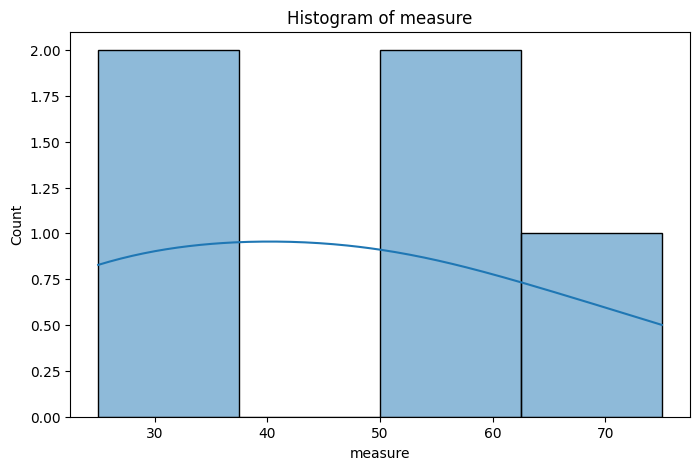

In [4]:
data_normal = pd.DataFrame({
        'year': np.array([1901, 1902, 1903, 1904, 1905]),
        'measure' : np.array([25, 25, 50, 50, 75]),
    })
column_plot = column_histogram(8,5,data_normal,'measure')
plt.show()

## Transform Labels

We can transform label values to binary format:

In [5]:
y = np.array([1, 1, 1])
y_transformed = map_labels_to_binary(y)
print("Transformed y:", y_transformed)

Transformed y: [0 0 0]


## Create Parameter Grid for Grid Search
Let's create a parameter grid for grid search to optimize our model hyperparameters

In [6]:
n_estimators_range = [100, 150, 200, 250, 300]
max_depth_range = [1, 5, 10, 15, 20]
param_grid = param_grid_for_grid_search(n_estimators_range, max_depth_range)
print("Parameter Grid:")
print(param_grid)

Parameter Grid:
{'n_estimators': [100, 150, 200, 250, 300], 'max_depth': [1, 5, 10, 15, 20]}
